In [1]:
#importing the required libraries
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth',100)
stopwords=nltk.corpus.stopwords.words('english')
ln=nltk.WordNetLemmatizer()
ps=nltk.PorterStemmer()

In [2]:
#importing the dataset
Rawdata=pd.read_csv('C:\\Users\\gautam.y.kumar\\Desktop\\NLP Demo\\nlpdataset.tsv',sep='\t',header=None)
Rawdata.columns=['label','Body_text']

In [3]:
Rawdata.head()

,label,Body_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [4]:
#performing all the cleaning process
def clean_text(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W+',text)
    text=[ln.lemmatize(word) for word in tokens if word not in stopwords]
    return text

In [5]:
Rawdata['Cleaned_text']=Rawdata['Body_text'].apply(lambda x:clean_text(x))
Rawdata.head()

,label,Body_text,Cleaned_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, go, usf, life, around, though]"


In [6]:
#Apply CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer(analyzer=clean_text)
x_count=count_vect.fit_transform(Rawdata['Body_text'])
print(x_count.shape)
print(count_vect.get_feature_names())

(5572, 8917)
['', '0', '008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', '08700621170150p

In [7]:
Data_sample=Rawdata[0:20]
count_vect_sample=CountVectorizer(analyzer=clean_text)
x_count_sample=count_vect_sample.fit_transform(Data_sample['Body_text'])
print(x_count_sample.shape)
print(count_vect_sample.get_feature_names())

In [8]:
#sparse matix
x_count_sample

(20, 220)
['08002986030', '08452810075over18s', '09061701461', '1', '100', '100000', '11', '12', '150', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6days', '81010', '87077', '87121', '87575', '9', '900', 'aid', 'already', 'amore', 'anymore', 'apply', 'around', 'available', 'b', 'back', 'blessing', 'breather', 'brother', 'buffet', 'bugis', 'c', 'call', 'caller', 'callertune', 'camera', 'cash', 'chance', 'chgs', 'cine', 'claim', 'click', 'co', 'code', 'colour', 'comp', 'copy', 'cost', 'crazy', 'credit', 'cried', 'csh11', 'cup', 'customer', 'darling', 'date', 'dont', 'dun', 'e', 'early', 'eg', 'eh', 'england', 'enough', 'entitled', 'entry', 'even', 'fa', 'feel', 'final', 'fine', 'free', 'freemsg', 'friend', 'fulfil', 'fun', 'go', 'goalsteam', 'gonna', 'got', 'gota', 'granted', 'great', 'help', 'hey', 'hl', 'home', 'hor', 'hour', 'httpwap', 'id', 'im', 'info', 'ive', 'jackpot', 'joking', 'jurong', 'k', 'kim', 'kl341', 'la', 'lar', 'latest', 'lcc

<20x220 sparse matrix of type '<class 'numpy.int64'>'
	with 248 stored elements in Compressed Sparse Row format>

In [9]:
x_count_df=pd.DataFrame(x_count_sample.toarray())

In [10]:
#to chek the from where we get sparse matrix
x_count_df.columns=count_vect_sample.get_feature_names()
x_count_df

,08002986030,08452810075over18s,09061701461,1,100,100000,11,12,150,150pday,...,wkly,wonderful,wont,word,world,wwwdbuknet,xxx,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# N-gram technique

In [11]:
#importing the required libraries
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth',100)
stopwords=nltk.corpus.stopwords.words('english')
ln=nltk.WordNetLemmatizer()
ps=nltk.PorterStemmer()

In [12]:
Rawdata=pd.read_csv('C:\\Users\\gautam.y.kumar\\Desktop\\NLP Demo\\nlpdataset.tsv',sep='\t',header=None)
Rawdata.columns=['label','Body_text']
Rawdata.head()

,label,Body_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [13]:
def clean_text_ngram(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W+',text)
    text=" ".join([ln.lemmatize(word) for word in tokens if word not in stopwords])
    return text

In [14]:
Rawdata['Cleaned_text']=Rawdata['Body_text'].apply(lambda x:clean_text_ngram(x))
Rawdata.head()

,label,Body_text,Cleaned_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questions...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think go usf life around though


In [15]:
#applying CountVectorizer with respect to N-Grams
from sklearn.feature_extraction.text import CountVectorizer
ngram_vect=CountVectorizer(ngram_range=(2,2))
X_counts=ngram_vect.fit_transform(Rawdata['Cleaned_text'])
print(X_counts.shape)
print(ngram_vect.get_feature_names())

(5572, 31669)
['008704050406 sp', '0089my last', '0121 2025050', '01223585236 xx', '01223585334 cum', '0125698789 ring', '02 user', '020603 2nd', '0207 153', '02072069400 bx', '02073162414 cost', '02085076972 reply', '020903 2nd', '021 3680', '021 3680offer', '050703 tcsbcm4235wc1n3xx', '06 good', '07046744435 arrange', '07090298926 reschedule', '07099833605 reschedule', '07123456789 87077', '0721072 find', '07732584351 rodger', '07734396839 ibh', '07742676969 show', '07753741225 show', '0776xxxxxxx uve', '077xxx 2000', '07801543489 guaranteed', '07808 xxxxxx', '07808247860 show', '07808726822 awarded', '07815296484 show', '0784987 show', '0789xxxxxxx today', '0796xxxxxx today', '07973788240 show', '07xxxxxxxxx 2000', '07xxxxxxxxx show', '0800 0721072', '0800 169', '0800 18', '0800 195', '0800 1956669', '0800 505060', '0800 542', '08000407165 18', '08000776320 reply', '08000839402 2stoptx', '08000839402 2stoptxt', '08000839402 call', '08000839402 call2optout4qf2', '08000839402 call2opt

In [16]:
#small Data set
Rawdata_sample=Rawdata[0:20]
ngram_vect_sample=CountVectorizer(ngram_range=(2,2))
X_counts_sample=ngram_vect_sample.fit_transform(Rawdata_sample['Cleaned_text'])
print(X_counts_sample.shape)
print(ngram_vect_sample.get_feature_names())

(20, 225)
['09061701461 claim', '100 20000', '100000 prize', '11 month', '12 hour', '150 rcv', '150pday 6days', '16 tsandcs', '20000 pound', '2005 text', '21st may', '4txtú120 poboxox36504w45wq', '6days 16', '81010 tc', '87077 eg', '87077 trywales', '87121 receive', '87575 cost', '900 prize', 'aid patent', 'already say', 'amore wat', 'anymore tonight', 'apply 08452810075over18s', 'apply reply', 'around though', 'available bugis', 'back id', 'blessing time', 'breather promise', 'brother like', 'buffet cine', 'bugis great', 'call 09061701461', 'call mobile', 'caller press', 'callertune caller', 'camera free', 'cash 100', 'chance win', 'chgs send', 'cine got', 'claim 81010', 'claim call', 'claim code', 'click httpwap', 'click wap', 'co free', 'code kl341', 'colour mobile', 'comp win', 'copy friend', 'cost 150pday', 'crazy available', 'credit click', 'cried enough', 'csh11 send', 'cup final', 'customer selected', 'darling week', 'date sunday', 'dont miss', 'dont think', 'dont want', 'dun s

In [17]:
X_counts_df=pd.DataFrame(X_counts_sample.toarray())
X_counts_df.columns=ngram_vect_sample.get_feature_names()
X_counts_df

,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150 rcv,150pday 6days,16 tsandcs,20000 pound,2005 text,...,wonderful blessing,wont take,word back,word claim,word thank,world la,wwwdbuknet lccltd,xxx std,xxxmobilemovieclub use,yes naughty
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Apply TFIDFVectorizer

In [18]:
#importing the required libraries
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth',100)
stopwords=nltk.corpus.stopwords.words('english')
ln=nltk.WordNetLemmatizer()
ps=nltk.PorterStemmer()

In [19]:
Rawdata=pd.read_csv('C:\\Users\\gautam.y.kumar\\Desktop\\NLP Demo\\nlpdataset.tsv',sep='\t',header=None)
Rawdata.columns=['label','Body_text']
Rawdata.head()

,label,Body_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [20]:
def clean_text_ngram(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W+',text)
    text=[ln.lemmatize(word) for word in tokens if word not in stopwords]
    return text

In [21]:
Rawdata['Cleaned_text']=Rawdata['Body_text'].apply(lambda x:clean_text_ngram(x))
Rawdata.head()

,label,Body_text,Cleaned_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, go, usf, life, around, though]"


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect=TfidfVectorizer(analyzer=clean_text)
x_tfidf_vect=tfidf_vect.fit_transform(Rawdata['Body_text'])
print(x_tfidf_vect.shape)
print(tfidf_vect.get_feature_names())

(5572, 8917)
['', '0', '008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', '08700621170150p

In [23]:
#apply Tfidf on smaller dataset
Rawdata_sample=Rawdata[0:20]
tfidf_vect_sample=TfidfVectorizer(analyzer=clean_text)
x_tfidf_sample=tfidf_vect_sample.fit_transform(Rawdata_sample['Body_text'])
print(x_tfidf_sample.shape)
print(tfidf_vect_sample.get_feature_names())

(20, 220)
['08002986030', '08452810075over18s', '09061701461', '1', '100', '100000', '11', '12', '150', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6days', '81010', '87077', '87121', '87575', '9', '900', 'aid', 'already', 'amore', 'anymore', 'apply', 'around', 'available', 'b', 'back', 'blessing', 'breather', 'brother', 'buffet', 'bugis', 'c', 'call', 'caller', 'callertune', 'camera', 'cash', 'chance', 'chgs', 'cine', 'claim', 'click', 'co', 'code', 'colour', 'comp', 'copy', 'cost', 'crazy', 'credit', 'cried', 'csh11', 'cup', 'customer', 'darling', 'date', 'dont', 'dun', 'e', 'early', 'eg', 'eh', 'england', 'enough', 'entitled', 'entry', 'even', 'fa', 'feel', 'final', 'fine', 'free', 'freemsg', 'friend', 'fulfil', 'fun', 'go', 'goalsteam', 'gonna', 'got', 'gota', 'granted', 'great', 'help', 'hey', 'hl', 'home', 'hor', 'hour', 'httpwap', 'id', 'im', 'info', 'ive', 'jackpot', 'joking', 'jurong', 'k', 'kim', 'kl341', 'la', 'lar', 'latest', 'lcc

In [24]:
x_tfidf_df=pd.DataFrame(x_tfidf_sample.toarray())
x_tfidf_df.columns=tfidf_vect_sample.get_feature_names()
x_tfidf_df

,08002986030,08452810075over18s,09061701461,1,100,100000,11,12,150,150pday,...,wkly,wonderful,wont,word,world,wwwdbuknet,xxx,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,yes
0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.251795,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0000,0.198423,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.198423,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.237559,0.000000,...,0.000000,0.000000,0.000000,0.188426,0.000000,0.000000,0.237559,0.000000,0.000000,0.000000
6,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.0000,0.000000,0.231645,0.000000,0.000000,0.000000,0.0000,0.231645,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.1971,0.000000,0.000000,0.000000,0.000000,0.000000,0.1971,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Feature Engineering:Feature Creation

In [25]:
import pandas as pd
Rawdata=pd.read_csv('C:\\Users\\gautam.y.kumar\\Desktop\\NLP Demo\\nlpdataset.tsv',sep='\t',header=None)
Rawdata.columns=['label','Body_text']
Rawdata.head()

,label,Body_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


# creating first feature as text message length

In [26]:
Rawdata['Bodylength']=Rawdata['Body_text'].apply(lambda x:len(x)-x.count(" "))
Rawdata.head()

,label,Body_text,Bodylength
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",92
1,ham,Ok lar... Joking wif u oni...,24
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
3,ham,U dun say so early hor... U c already then say...,39
4,ham,"Nah I don't think he goes to usf, he lives around here though",49


# creating second feature as % of text that is punctuation

In [27]:
import string
def count_punt(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

In [28]:
Rawdata['Punct_%']=Rawdata['Body_text'].apply(lambda x:count_punt(x))
Rawdata.head()

,label,Body_text,Bodylength,Punct_%
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",92,9.8
1,ham,Ok lar... Joking wif u oni...,24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
3,ham,U dun say so early hor... U c already then say...,39,15.4
4,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1


# Evaluate created features

In [29]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

C:\Users\gautam.y.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\gautam.y.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


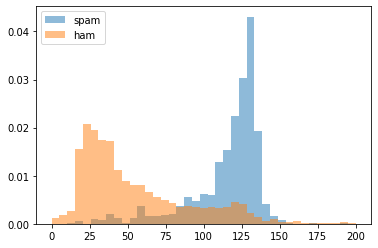

In [30]:
bins=np.linspace(0,200,40)
pyplot.hist(Rawdata[Rawdata['label']=='spam']['Bodylength'],bins,alpha=0.5,normed=True,label='spam')
pyplot.hist(Rawdata[Rawdata['label']=='ham']['Bodylength'],bins,alpha=0.5,normed=True,label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

C:\Users\gautam.y.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\gautam.y.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


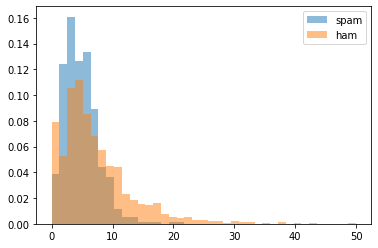

In [31]:
bins=np.linspace(0,50,40)
pyplot.hist(Rawdata[Rawdata['label']=='spam']['Punct_%'],bins,alpha=0.5,normed=True,label='spam')
pyplot.hist(Rawdata[Rawdata['label']=='ham']['Punct_%'],bins,alpha=0.5,normed=True,label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

# Feature Engineering: Transformation

In [32]:
import pandas as pd
Rawdata=pd.read_csv('C:\\Users\\gautam.y.kumar\\Desktop\\NLP Demo\\nlpdataset.tsv',sep='\t',header=None)
Rawdata.columns=['label','Body_text']
Rawdata.head()

,label,Body_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [33]:
import string
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100
Rawdata['Body_length']=Rawdata['Body_text'].apply(lambda x:len(x)-x.count(" "))
Rawdata['Punct_%']=Rawdata['Body_text'].apply(lambda x:count_punct(x))
Rawdata.head()

,label,Body_text,Body_length,Punct_%
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",92,9.8
1,ham,Ok lar... Joking wif u oni...,24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
3,ham,U dun say so early hor... U c already then say...,39,15.4
4,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1


In [34]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

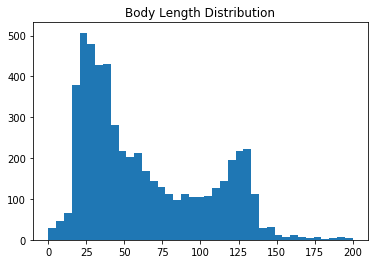

In [35]:
bins=np.linspace(0,200,40)

pyplot.hist(Rawdata['Body_length'],bins)
pyplot.title('Body Length Distribution')
pyplot.show()

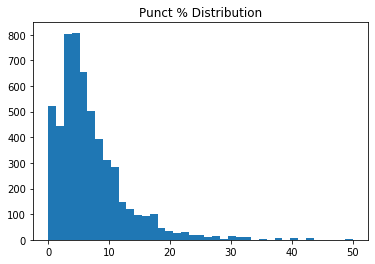

In [36]:
bins=np.linspace(0,50,40)

pyplot.hist(Rawdata['Punct_%'],bins)
pyplot.title('Punct % Distribution')
pyplot.show()

# Final Step building the model

In [37]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [38]:
stopwords=nltk.corpus.stopwords.words('english')
ps=nltk.PorterStemmer()

In [39]:
Rawdata=pd.read_csv('C:\\Users\\gautam.y.kumar\\Desktop\\NLP Demo\\nlpdataset.tsv',sep='\t',header=None)
Rawdata.columns=['label','Body_text']
Rawdata.head()

,label,Body_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [44]:
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

In [45]:
Rawdata['Body_len']=Rawdata['Body_text'].apply(lambda x:len(x)-x.count(" "))
Rawdata['punct%']=Rawdata['Body_text'].apply(lambda x:count_punct(x))

In [46]:
Rawdata

,label,Body_text,body_len,punct%,Body_len
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",92,9.8,92
1,ham,Ok lar... Joking wif u oni...,24,25.0,24
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7,128
3,ham,U dun say so early hor... U c already then say...,39,15.4,39
4,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1,49
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy...,131,6.1,131
5568,ham,Will ü b going to esplanade fr home?,29,3.4,29
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",48,14.6,48
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...,100,1.0,100


In [47]:
def clean_text(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W+',text)
    text=[ln.lemmatize(word) for word in tokens if word not in stopwords]
    return text

In [49]:
tfidf_vect=TfidfVectorizer(analyzer=clean_text)
x_tfidf=tfidf_vect.fit_transform(Rawdata['Body_text'])

x_features=pd.concat([Rawdata['Body_len'],Rawdata['punct%'],pd.DataFrame(x_tfidf.toarray())],axis=1)
x_features.head()

,Body_len,punct%,0,1,2,3,4,5,6,7,...,8907,8908,8909,8910,8911,8912,8913,8914,8915,8916
0,92,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39,15.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score

In [53]:
print(dir(RandomForestClassifier))
print(RandomForestClassifier())

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_estimator_type', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_required_parameters', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0

In [54]:
rfc=RandomForestClassifier(n_jobs=-1)
k_fold=KFold(n_splits=5)
cross_val_score(rfc,x_features,Rawdata['label'],cv=k_fold,scoring='accuracy',n_jobs=-1)

array([0.96860987, 0.97130045, 0.97307002, 0.9551167 , 0.96499102])

In [55]:
#checking the accuracy for precision
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_text,y_train,y_test=train_test_split(x_features,Rawdata['label'],test_size=0.2)

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50,max_depth=20,n_jobs=-1)
rfc_model=rfc.fit(x_train,y_train)

In [59]:
sorted(zip(rfc_model.feature_importances_,x_train.columns),reverse=True)[0:10]

[(0.05982501541170128, 'Body_len'),
 (0.041186869246214196, 3424),
 (0.028840072010863426, 5245),
 (0.024137982848302285, 8106),
 (0.022889716299143815, 2324),
 (0.022093402370365233, 1901),
 (0.021974030163135032, 6258),
 (0.017254083134360776, 7754),
 (0.015384546547954438, 6576),
 (0.014989850087948892, 2157)]

In [60]:
y_pred=rfc_model.predict(x_text)
precision,recall,fscore,support=score(y_test,y_pred,pos_label='spam',average='binary')

In [68]:
print('precision:{}/ Recall:{} /Accuracy: {}'.format(round(precision,3),
                                                   round(recall,3),
                                                   round(y_pred==y_test).sum()/len(y_pred),3))

precision:1.0/ Recall:0.594 /Accuracy: 0.9479820627802691


# Final Decision